In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from numpy import trapz

In [5]:
def plot_data_DC(filename):
    name = filename #wykorzystywane w #fig.savefig(name)
    f = pd.read_csv(filename+'.dat', sep=r"\s+") #tworzę dataframe
    # f.describe()

    fig = plt.figure()
    plt.scatter(f['voltage'], f["series1"]) 
    plt.xlabel('U [V]')
    plt.ylabel('I [mA]')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
    # fig.savefig(name)
    # f.describe()

In [6]:
def loop_area_DC(filename):
    f = pd.read_csv(filename+'.dat', sep=r"\s+")
    
    zero_voltage = []
    max_voltage = max(f["voltage"])
    min_voltage = min(f["voltage"])
    number_of_points = len(f.index) #ilość punktów pomiarowych

    #kod który będzie liczył liczbę pkt na pomiar w 1 stronę
    #krok pomiarowy jest zawsze stały, stąd też liczę krok pomiarowy pomiędzy dwoma dowolnymi punktami
    measurement_step = f["voltage"][1] - f["voltage"][0]

    #pomiar rozpoczyna się zawsze od 0, szukam liczby punktów pomiędzy (max_voltage, a 0)/odległość pom. pkt = l. pkt w 1 stronę
    one_way = int((max(f["voltage"]) - f["voltage"][0])/measurement_step)

    for i in range(0,number_of_points,one_way): #wyznaczam indeksy dla U = 0 V, liczba wierszy - co one_way zawsze przecinam OX
        zero_voltage.append(i) #tworzę listę z indeksami punktów dla ktorych U = 0V
    # print(zero_voltage)

    limit = len(zero_voltage)-1    #ustalam limit zakresu iteracji jako liczbę punktów gdzie U=0V 
#     print(limit) #16

    another_list = []
    for i in zero_voltage: #sprawdzam czy wszystkie U = 0 V - całkowicie pomocniczo
        another_list.append(f.loc[i])
    # print(another_list) 
    
    area = []
    area2 = []

    #dzielę dane na 2 zakresy: napięcia rosną 0->+/-50
    for i in range(0,limit,2): #wykresy i printy służą do śledzenia czy dane po których całkuję są w poprawnym zakresie
        y = f["series1"][zero_voltage[i]:zero_voltage[i+1]+1]
        area.append(trapz(y, dx = -5))
    #     print(f[zero_voltage[i]:zero_voltage[i+1]+1]) #potrzebny mi zakres 0 -> max stąd +1 (0 to [0], a np 50 to [11])
    #     fig1 = plt.figure()
    #     a = f['voltage'][zero_voltage[i]]
    #     b = f['voltage'][zero_voltage[i+1]]
    #     name_of_plot = 'Volatges: ' + str(a) +'V : ' + str(b) + 'V   Sweep: ' + str(i)
    #     plt.title(name_of_plot)
    #     plt.scatter(f['voltage'][zero_voltage[i]:zero_voltage[i+1]+1], f["series1"][zero_voltage[i]:zero_voltage[i+1]+1]) 
    #     plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

    #napięcia maleją +/-50->0
    for i in range(1,limit+1,2):
        y = f["series1"][zero_voltage[i]:zero_voltage[i+1]+1]
        area2.append(trapz(y, dx = -5))
    #     print(f[zero_voltage[i]:zero_voltage[i+1]+1])
    #     fig1 = plt.figure()
    #     a = f['voltage'][zero_voltage[i]]
    #     b = f['voltage'][zero_voltage[i+1]]
    #     name_of_plot = 'Volatges: ' + str(a) +'V : ' + str(b) + 'V   Sweep: ' + str(i)
    #     plt.title(name_of_plot)
    #     plt.scatter(f['voltage'][zero_voltage[i]:zero_voltage[i+1]+1], f["series1"][zero_voltage[i]:zero_voltage[i+1]+1]) 
    #     plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

    # odejmuję od powierzchni +/-50->0 powierzchnię 0->+/-50    
    area_of_loop = []
    for i in range(0,len(area)):
        area_of_loop.append(abs(area2[i]-area[i]))
    #     area_of_loop.append(area2[i] - area[i])
#     print('Area of loops: ', area_of_loop)

    #rysuję wykresy każdej pętli z uwzględnieniem nr. pętli oraz pola powierzchni
    for i in range(0,limit+1,2):
        if i <= limit-2: #potrzebne ze względu na zakres iteracji
            name_of_plot = 'Sweeps: ' + str(i+1) + ',' + str(i+2) + ',  Area of loop: ' + str(area_of_loop[int(i/2)]) 
            fig2 = plt.figure()
            plt.title(name_of_plot)
            plt.scatter(f['voltage'][zero_voltage[i]:zero_voltage[i+2]], f["series1"][zero_voltage[i]:zero_voltage[i+2]]) 
            plt.xlabel('U [V]')
            plt.ylabel('I [mA]')
            plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        else:
            break

    #tworzę nowy data frame z danymi z numerem pętli oraz jej polem powierzchni, z # kod do eksportu .csv
    loop_number = [i for i in range(1,int(limit/2)+1)]
    df = pd.DataFrame({'Loop number': loop_number, 'Area of loop': area_of_loop})
    print(df)
#     df.to_csv('area_' + filename + '.csv')
    neg_lst = []
    pos_lst = []
   #informacje porównujące poszczególne pętle - jak zmienia się powierzchnia względem pierwszwgo cyklu
    for i in range(2,len(area_of_loop)):
        if (i-1)%2 == 0: #i-1 ze względu na zakres iteracji
    #         print(i)
            is_greater = area_of_loop[i]/area_of_loop[1]
            print('Loop ' + str(i+1) + ' is ' + str(is_greater) + ' times the first (2) loop in negative sweep')
        if (i-1)%2 != 0:
            is_greater2 = area_of_loop[i]/area_of_loop[0]
            print('Loop ' + str(i+1) + ' is ' + str(is_greater2) + ' times the first (1) loop in positive sweep')

In [2]:
def plot_data_AC(filenameAC): #nazwy danych należy wprowadzać ręcznie ponieważ program nie zapisuje częstotliwości
    nameAC = filenameAC
    ac = pd.read_csv(filenameAC+'.dat', sep=r"\s+",skiprows=[0]) #tworzę data frame
    num_cols = ac.shape[1] #szukam liczby kolumn
    lst = [i for i in range(1,num_cols+1,2)] #tworzę listę z indeksami odpowiadającymi natężeniom prądu 
    lst.append(0)
    df2 = pd.read_csv(filenameAC+'.dat', sep=r"\s+", usecols=lst,skiprows=[0]) #wycinam U ponieważ wszędzie są takie same

    rows = []
    for row in df2:
        rows.append(row)
#     print(rows)

    for n in rows[1::]:
#         print(n)
        fig2 = plt.figure()
        plt.scatter(df2['U[V]'], df2[n]) 
        plt.title(n)
        plt.xlabel('U [V]')
        plt.ylabel('I [mA]')
        plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
       
    
    print('Data frame:\n', df2)

In [54]:
def area_AC(filenameAC):
    nameAC = filenameAC
    ac = pd.read_csv(filenameAC+'.dat', sep=r"\s+",skiprows=[0]) #tworzę data frame
    num_cols = ac.shape[1] #szukam liczby kolumn
    lst = [i for i in range(1,num_cols+1,2)] #tworzę listę z indeksami odpowiadającymi natężeniom prądu
    lst.append(0)
    
    df2 = pd.read_csv(filenameAC+'.dat', sep=r"\s+", usecols=lst,skiprows=[0])
    measurement_step_AC = df2["U[V]"][1] - df2["U[V]"][0] #powtarzam to co wcześniej, szukam kroku pomiarowego
#     print(measurement_step_AC)
    num_of_points_one_way = int((max(df2["U[V]"]) - df2["U[V]"][0])/measurement_step_AC)
#     print(num_of_points_one_way)
#     print('\033[1m' +'Data for each subsequent measurement:\n'+ '\033[0m')
#     print(df2)
# ############################################################################################################
# #podobnie do pomiarów DC, liczę pole powierzchni, tutaj stosuję trochę inne podejście ze względu sposób zapisu
# #pliku pomiarowego - każdą z kolumn trzeba liczyć osobno (jako kolejną iterację w pętli)
# #dodatkowo, całkuję po całej kolumnie w jednej pętli, licząc po kolei: całkę po odcinkach, pole powierzchni,
# #różnicę w polu powierzchni pomiędzy kolejnymi cyklami pomiarowymi (względem 1 cyklu) 
# ############################################################################################################

    rows = []
    for row in df2:
        rows.append(row) #tworzę listę z nazwami kolumn, tak, żeby móc po nich iterować w kolejnej pętli (od[1::] ponieważ
                         #pierwsza kolumna zawiera napięcia)
#     print(rows)

    data1 = []
    data2 = []
    for n in rows[1::]: #dla każdej kolumny z pomiarami
        integrate = [] #tworzę nową listę
        for i in range(0,len(df2.index),measurement_step_AC+1):  
            y = df2[n][i:i+measurement_step_AC+2] #dzielę dane na części "pomiędzy" przecięciem osi OY/OX (U = 0V)
#             print(y)

            integrate.append(trapz(y, dx = 5)) #liczę całkę dla każdego etapu
        print('\n' + '\033[1m' + 'Series: ', n + '\033[0m')
#         print('Integral of each measurement step: ',integrate)
        
        area_AC = []  #tworzę listę na pola powierzchni
        for i in range(0,len(integrate)+1,2):
            if i <= len(integrate)-2:
                area_AC.append(abs(integrate[i+1])-abs(integrate[i])) 
        print('Area of loops: ',area_AC)
        print('Max area: ' + str(max(area_AC))+ ' (loop: ' + str(area_AC.index(max(area_AC))+1)+')')
        print('Min area: ' + str(min(area_AC))+ ' (loop: ' + str(area_AC.index(min(area_AC))+1)+')')

        area_diff_AC_pos = [] #tworzę listy osobno dla porównania różnic w polu powierzchni dla +/- potencjału
        area_diff_AC_neg = []
        #w przypadku tych pomiarów szczególnie interesują mnie zmiany pola powierzchni pomiędzy kolejnymi cyklami
        for i in range(2,len(area_AC),1):
            if i%2 == 0:
                area_diff_AC_pos.append(area_AC[i]/area_AC[0])
            if i%2 != 0:
                area_diff_AC_neg.append(area_AC[i]/area_AC[1])
#         print('% of the first loop area for each subsequent cycle in positive polarisation: ', area_diff_AC_pos)
#         print('% of the first loop area for each subsequent cycle in negative polarisation: ', area_diff_AC_neg)
        print('\n % of the first loop area for each subsequent cycle:')
#         df3 = pd.DataFrame({'Area difference (pos)': area_diff_AC_pos, 'Area difference (neg)': area_diff_AC_neg})
#         print(df3)
#         save_data = open(filenameAC+str(n)+"_opracowania3.txt","x")
#         save_data.write(str(df3)+'\n')
#         save_data.close()
        data1.append(integrate)
        data2.append(area_AC)
#     print(data)
    integral_data =  pd.DataFrame(data=data1).transpose()
    print('\n' + '\033[1m' + 'Integral values for each measurement (column) and measurement step (row): \n' + '\033[0m',integral_data)
    area_data = pd.DataFrame(data=data2).transpose()
    print('\n' + '\033[1m' + 'Loop area for each measurement (column), loop number (row): \n' + '\033[0m',area_data)

In [55]:
area_AC("K_01_mod_pos_pin3_freq")


Series:  I[mA]
Area of loops:  [0.02478382767924958, 0.014791644049249708, 0.021423183663249912, 0.013188822010750112, 0.02001558801250014, -0.03526766961000005]
Max area: 0.02478382767924958 (loop: 1)
Min area: -0.03526766961000005 (loop: 6)

 % of the first loop area for each subsequent cycle:

Series:  I[mA].1
Area of loops:  [0.023388185344699775, 0.014351705664699788, 0.020551265120000384, 0.01321211903500008, 0.018443397388999694, -0.03534831464849986]
Max area: 0.023388185344699775 (loop: 1)
Min area: -0.03534831464849986 (loop: 6)

 % of the first loop area for each subsequent cycle:

Series:  I[mA].2
Area of loops:  [0.022830653420000013, 0.014792841306000115, 0.018487777608499956, 0.012982805877499892, 0.017455287216749937, -0.034348966895749955]
Max area: 0.022830653420000013 (loop: 1)
Min area: -0.034348966895749955 (loop: 6)

 % of the first loop area for each subsequent cycle:

Series:  I[mA].3
Area of loops:  [0.0214570223733499, 0.014914408633349696, 0.0188845453860002

   Loop number  Area of loop
0            1      0.441542
1            2      0.368171
2            3      0.596204
3            4      0.499715
4            5      0.700297
5            6      0.502682
6            7      0.798781
7            8      0.483733
Loop 3 is 1.350278936244885 times the first (1) loop in positive sweep
Loop 4 is 1.3572899765340214 times the first (2) loop in negative sweep
Loop 5 is 1.5860284333080013 times the first (1) loop in positive sweep
Loop 6 is 1.3653483533273623 times the first (2) loop in negative sweep
Loop 7 is 1.8090741756517148 times the first (1) loop in positive sweep
Loop 8 is 1.3138799365902525 times the first (2) loop in negative sweep


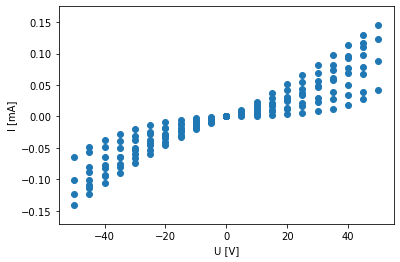

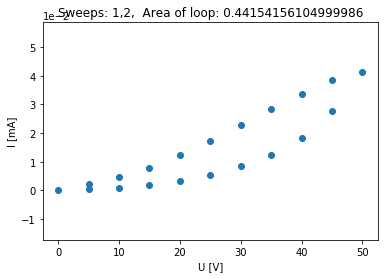

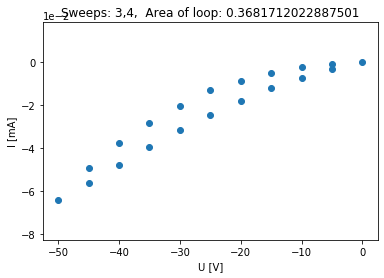

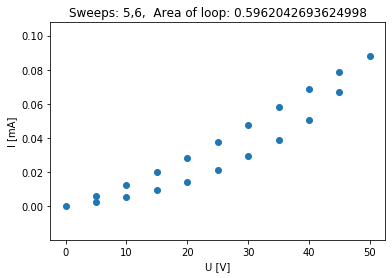

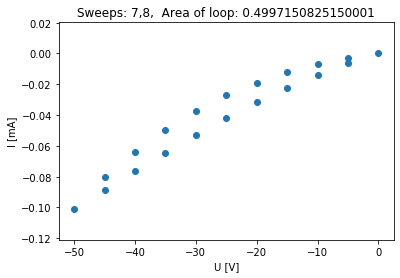

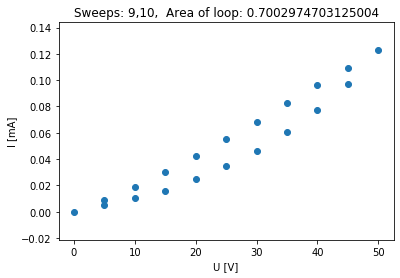

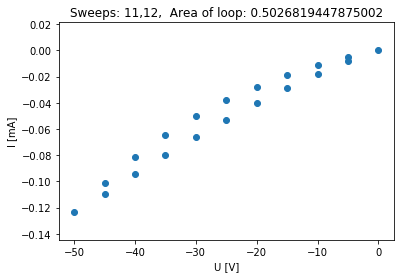

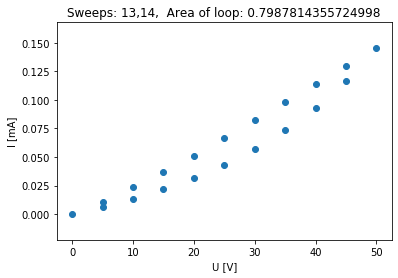

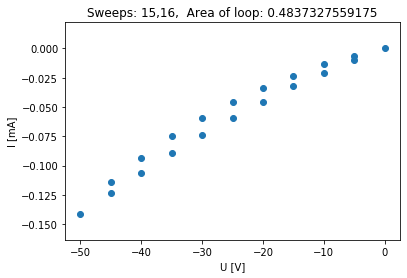

In [7]:
plot_data_DC("P3HT_P4VP_CoBr2_PSS_Br1_sweep_positive")
loop_area_DC("P3HT_P4VP_CoBr2_PSS_Br1_sweep_positive")

Data frame:
     U[V]         I[mA]       I[mA].1       I[mA].2       I[mA].3  \
0      0  1.758838e-06  1.724879e-06  1.704817e-06  1.721920e-06   
1      4  1.643469e-02  1.655845e-02  1.653023e-02  1.650030e-02   
2      8  3.373404e-02  3.395551e-02  3.385015e-02  3.383366e-02   
3     12  5.236629e-02  5.263104e-02  5.246096e-02  5.239654e-02   
4     16  7.276224e-02  7.306635e-02  7.280885e-02  7.264596e-02   
5     20  9.516485e-02  9.546427e-02  9.512574e-02  9.481067e-02   
6     16  7.429717e-02  7.452516e-02  7.425348e-02  7.400948e-02   
7     12  5.401057e-02  5.420021e-02  5.399220e-02  5.383446e-02   
8      8  3.492177e-02  3.506246e-02  3.493749e-02  3.483560e-02   
9      4  1.702532e-02  1.710197e-02  1.703389e-02  1.698916e-02   
10     0  1.499097e-07  9.901688e-08  2.261850e-07  5.086934e-08   
11    -4 -1.874277e-02 -1.873808e-02 -1.858892e-02 -1.849997e-02   
12    -8 -3.915956e-02 -3.912456e-02 -3.881403e-02 -3.860934e-02   
13   -12 -6.060440e-02 -6.054076e-0

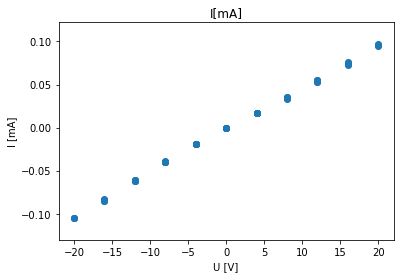

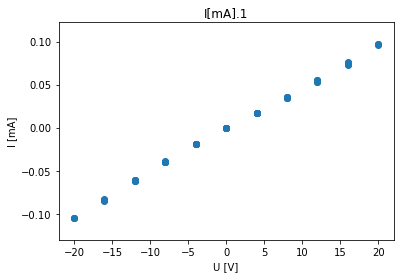

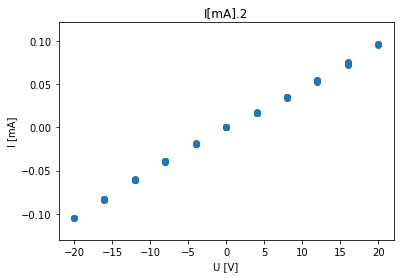

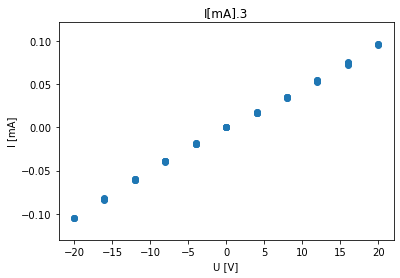

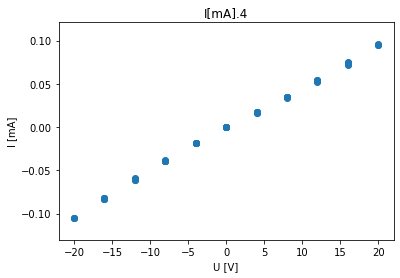

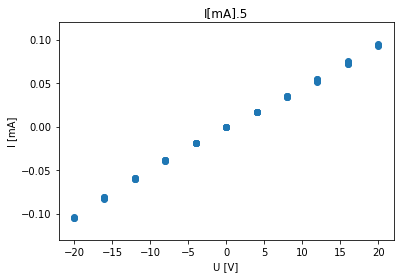

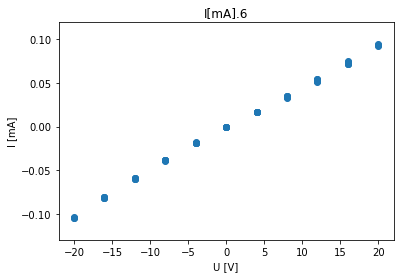

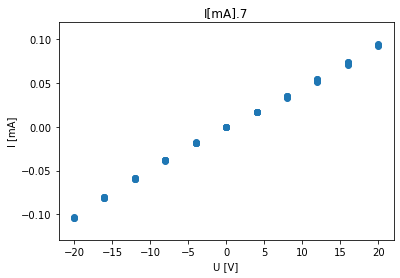

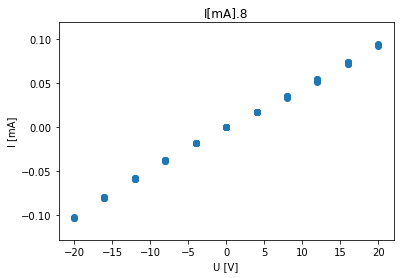

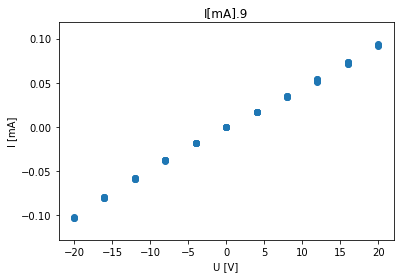

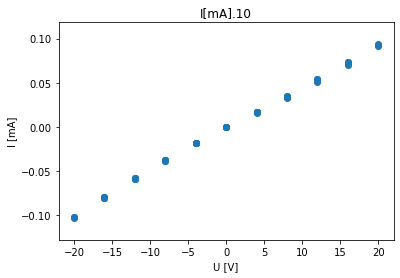

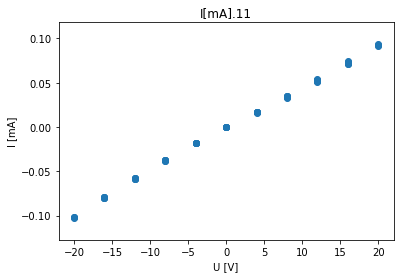

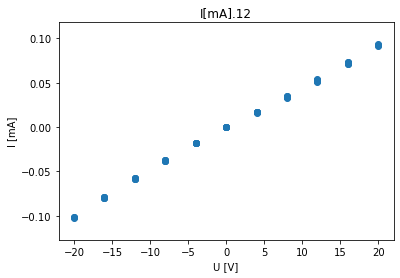

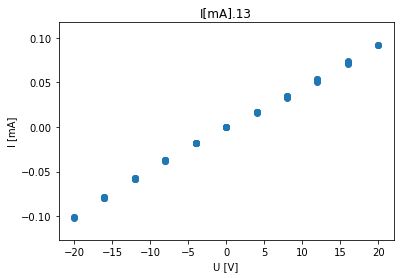

In [25]:
plot_data_AC("K_01_mod_pos_pin3_freq")
